1. Import the csv file into a Data Frame.
2. Identify the number of columns and check the size of the dataframe

In [108]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('loan.csv')

df.columns


/var/folders/77/ctnwfzn11db8gx0b2gh55y0h0000gn/T/ipykernel_73518/667487445.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [109]:
#Understand the shape of the DataFrame
df.shape





(39717, 111)

In [110]:

#Drop the columns with all the null values
nullDroppedDf = df.dropna(axis=1,how='all').dropna(how='all')

Get the list of all existing columns after deleting the columns with null values

In [111]:
import numpy as np
cols = np.array(nullDroppedDf.columns)
cols.sort()
cols

array(['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'desc',
       'dti', 'earliest_cr_line', 'emp_length', 'emp_title',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id',
       'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate',
       'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',
       'loan_amnt', 'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d', 'open_acc', 'out_prncp',
       'out_prncp_inv', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util',
       'sub_grade', 'tax_liens', 'term', 'title', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'url',
       'verification_status', 'zip

Get the list of all the columns which have unique values in all its rows

In [112]:
#understand the current shape of the dataframe
nullDroppedDf.shape
#(39717, 57)

#get the count of all the columns which have a unique value in it.
uniquecols = [col for col in np.array(nullDroppedDf.columns) if nullDroppedDf[col].nunique() == 1]
len(uniquecols)

9

In [113]:
# checking the values of the columns which have unique values
nullDroppedDf[uniquecols].head()

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0


Drop all the values with unique values because they will not provide any additional insights into the data

In [114]:
udf = nullDroppedDf.drop(nullDroppedDf.columns[nullDroppedDf.nunique() == 1].tolist(),axis=1)
#nullDroppedDf.to_excel('nullDropped.xlsx',index=False)

The shape of the dataframe after deleting the columns which are not relevant

In [115]:
udf.shape

(39717, 48)

Final list of columns on which the data analysis needs to be done

In [116]:
udf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Understanding some of the columns in the Dataframe

In [117]:
# The number of months within 2 years that have been delinqued.
udf.delinq_2yrs.value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [118]:
# Seems like this column also has only one value in it
df.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [119]:
#understanding column values.
udf.collection_recovery_fee.value_counts()

0.0000      35935
2.0000         12
1.2000         10
3.7100          9
1.8800          8
            ...  
3.7900          1
773.4900        1
272.8250        1
1.7697          1
0.2300          1
Name: collection_recovery_fee, Length: 2616, dtype: int64

In [120]:
#understanding the values in the column
udf.recoveries.value_counts()

0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: recoveries, Length: 4040, dtype: int64

We will have to rename all the columns whose names dont provide sufficient information.

In [121]:
new_column_names = {'acc_now_delinq':'num_of_curr_delq_acc',
'collection_recovery_fee':'collection_fee_post_chargeoff',
'collections_12_mths_ex_med':'num_of_coll_in_12_mnths_ex_med',
'delinq_2yrs':'num_of_30plus_del_amt_for_2yrs',
'delinq_amnt':'pastdue_owed_amt_on_delq_acct',
'desc':'loan_desc_by_borrower',
'dti':'debt_to_income_ratio',
'earliest_cr_line':'mnth_earliest_crdt_line_opened',
'emp_length':'emplyment_len_yrs',
'emp_title':'borrower_emplymnt_title',
'funded_amnt_inv':'total_committed_amnt_by_investors',
'grade':'assgnd_loan_grade',
'id':'loan_listing_id',
'initial_list_status':'initial_loan_listing_status',
'inq_last_6mths':'num_inq_past_6mnths',
'installment':'mnthly_installment',
'int_rate':'loan_interest_rate',
'issue_d':'loan_funded_mnth',
'last_credit_pull_d':'mnth_recent_credit_pulled',
'last_pymnt_amnt':'last_total_pymnt_amnt_receivd',
'last_pymnt_d':'last_mnth_was_pymnt_receivd',
'loan_amnt':'curr_apprvd_loan_amnt',
'term':'loan_term_mnths',
'next_pymnt_d':'next_payment_date',
'open_acc':'num_of_open_credit_accnts',
'out_prncp':'outstanding_prinpl_amnt',
'out_prncp_inv':'outstanding_prinpl_investors',
'pub_rec':'num_derogtry_publc_recs',
'pub_rec_bankruptcies':'num_publc_rec_bankruptcies',
'purpose':'loan_purpose',
'revol_util':'revolv_util_rate',
'tax_liens':'num_tax_liens',
'title':'loan_title',
'total_acc':'num_total_curr_acc_lines_',
'total_pymnt':'total_payments_received',
'total_pymnt_inv':'total_payments_received_inv',
'total_rec_int':'total_interest_received',
'total_rec_late_fee':'total_late_fee_received',
'total_rec_prncp':'total_principal_received',
'verification_status':'incm_src_verification_status'
}

In [122]:
#renaming all the columns and making the change permanent
udf = udf.rename(columns=new_column_names)

Checking the list of all the columns

In [123]:
udf.columns

Index(['loan_listing_id', 'member_id', 'curr_apprvd_loan_amnt', 'funded_amnt',
       'total_committed_amnt_by_investors', 'loan_term_mnths',
       'loan_interest_rate', 'mnthly_installment', 'assgnd_loan_grade',
       'sub_grade', 'borrower_emplymnt_title', 'emplyment_len_yrs',
       'home_ownership', 'annual_inc', 'incm_src_verification_status',
       'loan_funded_mnth', 'loan_status', 'url', 'loan_desc_by_borrower',
       'loan_purpose', 'loan_title', 'zip_code', 'addr_state',
       'debt_to_income_ratio', 'num_of_30plus_del_amt_for_2yrs',
       'mnth_earliest_crdt_line_opened', 'num_inq_past_6mnths',
       'mths_since_last_delinq', 'mths_since_last_record',
       'num_of_open_credit_accnts', 'num_derogtry_publc_recs', 'revol_bal',
       'revolv_util_rate', 'num_total_curr_acc_lines_',
       'outstanding_prinpl_amnt', 'outstanding_prinpl_investors',
       'total_payments_received', 'total_payments_received_inv',
       'total_principal_received', 'total_interest_received

The next stage is to understand the datatype of those columns. Convert them to relevant datatypes so that analysis on that data becomes easy

In [124]:
print(udf.dtypes)

loan_listing_id                        int64
member_id                              int64
curr_apprvd_loan_amnt                  int64
funded_amnt                            int64
total_committed_amnt_by_investors    float64
loan_term_mnths                       object
loan_interest_rate                    object
mnthly_installment                   float64
assgnd_loan_grade                     object
sub_grade                             object
borrower_emplymnt_title               object
emplyment_len_yrs                     object
home_ownership                        object
annual_inc                           float64
incm_src_verification_status          object
loan_funded_mnth                      object
loan_status                           object
url                                   object
loan_desc_by_borrower                 object
loan_purpose                          object
loan_title                            object
zip_code                              object
addr_state

In [125]:
#converting date values to datetime so that comparisons, creating derived columns becomes easier.
#udf.num_publc_rec_bankruptcies = pd.to_datetime(udf.num_publc_rec_bankruptcies)
udf.mnth_earliest_crdt_line_opened = pd.to_datetime(udf.mnth_earliest_crdt_line_opened,format='%b-%y')
udf.next_payment_date = pd.to_datetime(udf.next_payment_date,format='%b-%y')
udf.mnth_recent_credit_pulled = pd.to_datetime(udf.mnth_recent_credit_pulled,format='%b-%y')
#udf.loan_funded_mnth = pd.to_datetime(udf.loan_funded_mnth,format='%b-%y')
udf.last_mnth_was_pymnt_receivd = pd.to_datetime(udf.last_mnth_was_pymnt_receivd,format='%b-%y')

In [126]:
#understanding if this column is useful
udf.num_publc_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: num_publc_rec_bankruptcies, dtype: int64

In [127]:
import re

#udf.dtypes
udf.emplyment_len_yrs = udf['emplyment_len_yrs'].astype(str).apply(lambda x: re.findall(r'\d+\.?\d*', x)[0] if re.findall(r'\d+\.?\d*', x) else None)

In [128]:
#converting int values to int by removing alpha numeric characters.
udf.loan_term_mnths = udf.loan_term_mnths.str.replace(' months','')
udf.loan_interest_rate = udf.loan_interest_rate.str.replace('%','')
udf.revolv_util_rate = udf.revolv_util_rate.str.replace('%','')

In [129]:
#converting them to relevant types
udf.loan_term_mnths = udf.loan_term_mnths.astype(int)
udf.loan_interest_rate = udf.loan_interest_rate.astype(float)
udf.revolv_util_rate = udf.revolv_util_rate.astype(float)

In [130]:
#understanding if the loan applicants are unique
udf.member_id.nunique()

39717

In [131]:
# dropping loan id and member id as they are not useful for analysis
udf.drop(['loan_listing_id','member_id'],axis=1, inplace=True)
udf

,curr_apprvd_loan_amnt,funded_amnt,total_committed_amnt_by_investors,loan_term_mnths,loan_interest_rate,mnthly_installment,assgnd_loan_grade,sub_grade,borrower_emplymnt_title,emplyment_len_yrs,...,total_principal_received,total_interest_received,total_late_fee_received,recoveries,collection_fee_post_chargeoff,last_mnth_was_pymnt_receivd,last_total_pymnt_amnt_receivd,next_payment_date,mnth_recent_credit_pulled,num_publc_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,...,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,...,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,...,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,...,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4,...,2500.00,322.97,0.00,0.00,0.00,2010-07-01,80.90,NaT,2010-06-01,NaN
39713,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3,...,8500.00,1413.49,0.00,0.00,0.00,2010-07-01,281.94,NaT,2010-07-01,NaN
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN,1,...,5000.00,272.16,0.00,0.00,0.00,2008-04-01,0.00,NaT,2007-06-01,NaN
39715,5000,5000,650.0,36,7.43,155.38,A,A2,NaN,1,...,5000.00,174.20,0.00,0.00,0.00,2008-01-01,0.00,NaT,2007-06-01,NaN


In [132]:
import matplotlib.pyplot as plt

# most of the deliquent number of months have been for 0 months
counts = udf.num_of_30plus_del_amt_for_2yrs.value_counts()
#plt.bar(counts.index,counts.values/sum(counts.values))
udf.num_of_30plus_del_amt_for_2yrs.value_counts()






#uniqueDroppedDf.num_of_30plus_del_amt_for_2yrs

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: num_of_30plus_del_amt_for_2yrs, dtype: int64

In [133]:

udf.isna().sum()



curr_apprvd_loan_amnt                    0
funded_amnt                              0
total_committed_amnt_by_investors        0
loan_term_mnths                          0
loan_interest_rate                       0
mnthly_installment                       0
assgnd_loan_grade                        0
sub_grade                                0
borrower_emplymnt_title               2459
emplyment_len_yrs                     1075
home_ownership                           0
annual_inc                               0
incm_src_verification_status             0
loan_funded_mnth                         0
loan_status                              0
url                                      0
loan_desc_by_borrower                12940
loan_purpose                             0
loan_title                              11
zip_code                                 0
addr_state                               0
debt_to_income_ratio                     0
num_of_30plus_del_amt_for_2yrs           0
mnth_earlie

In [134]:
udf.mths_since_last_delinq.describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [135]:
# Delete the columns which have a lot of null values.
udf.drop(['loan_desc_by_borrower','mths_since_last_record','next_payment_date'],axis=1, inplace=True)
udf.shape

(39717, 43)

In [136]:
#The column has a lot null values but since there is chance that it is NA because the account was never delinq, replacing NA with 0 to make sense out of data
udf.mths_since_last_delinq.value_counts()
udf.mths_since_last_delinq.fillna(0,inplace=True)

In [137]:
#Changing the type of the column to int
udf.mths_since_last_delinq.astype(int)

0         0
1         0
2         0
3        35
4        38
         ..
39712     0
39713     5
39714     0
39715     0
39716    11
Name: mths_since_last_delinq, Length: 39717, dtype: int64

In [138]:
import seaborn as sns
#understanding the data in the approved loan amount
udf.curr_apprvd_loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: curr_apprvd_loan_amnt, dtype: float64

In [139]:
# The correlation between Dti and number of 30plus days deliquent amt for 2 years is neutral
udf['debt_to_income_ratio'].corr(udf['num_of_30plus_del_amt_for_2yrs'])

-0.03445155788349111

In [140]:
# there are 3 types of verification and understanding how the values have an effect on the charged off accounts
udf['incm_src_verification_status'].value_counts()


Not Verified       16921
Verified           12809
Source Verified     9987
Name: incm_src_verification_status, dtype: int64

<BarContainer object of 3 artists>

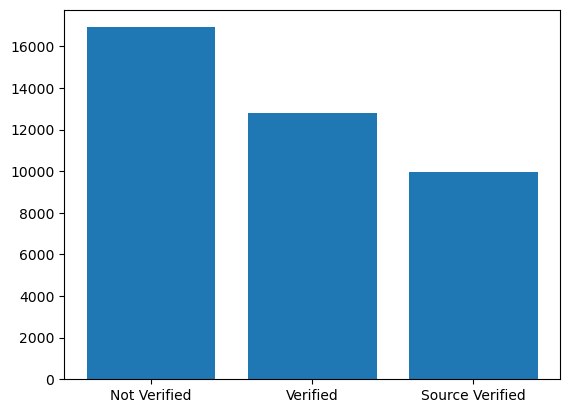

In [141]:
#Understanding how many are verified and not verified sources.
import matplotlib.pyplot as plt
#plt.bar(chrgdOffLoandf['incm_src_verification_status'].value_counts().index,chrgdOffLoandf['incm_src_verification_status'].value_counts().count)
counted = udf['incm_src_verification_status'].value_counts()
plt.bar(counted.index,counted.values)

In [142]:
#checking the values of sub grade and grade
udf.sub_grade.value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

Checking the influence of grade on the interest rates.

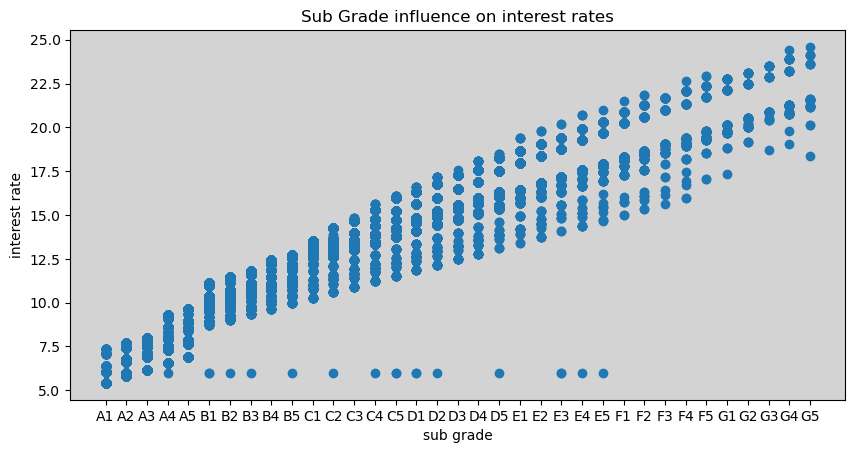

In [143]:

sorted_data = sorted(zip(udf['sub_grade'], udf['loan_interest_rate']))
sorted_x, sorted_y = zip(*sorted_data)

# Create the Figure and Axes objects
fig, ax = plt.subplots()
fig.set_figwidth(10)

# Create the scatter plot
ax.scatter(sorted_x, sorted_y)

# Customize the chart
ax.set_title('Sub Grade influence on interest rates')
ax.set_xlabel('sub grade')
ax.set_ylabel('interest rate')
ax.set_facecolor('lightgray')

# Show the chart
plt.show()


Fully Paid     32950
Charged Off     5627
Current         1140

Marking the loan_status to values so that it can be used for visualization
1. Charged Off is mapped to -1
2. Current is mapped to 0
3. Fully Paid is mapped to 1

In [144]:

udf.assgnd_loan_grade.value_counts()
def mapValues(x):
    if (x == 'Charged Off'):
        return -1
    if (x == 'Fully Paid'):
        return 1
    if (x == 'Current'):
        return 0
udf['loan_status_value'] = udf['loan_status'].apply(mapValues)


In [145]:
pd.pivot_table(udf,values='loan_status_value',index='assgnd_loan_grade',columns=['incm_src_verification_status','loan_status'],aggfunc='count')

incm_src_verification_status Not Verified                    Source Verified  \
loan_status                   Charged Off Current Fully Paid     Charged Off   
assgnd_loan_grade                                                              
A                                     316      20       4855             140   
B                                     618      80       4707             354   
C                                     587      65       2850             316   
D                                     408      39       1503             311   
E                                     151      15        490             194   
F                                      45       7        121              93   
G                                      17       1         26              26   

incm_src_verification_status                       Verified                     
loan_status                  Current Fully Paid Charged Off Current Fully Paid  
assgnd_loan_grade                                                               
A                                 12       2394         146       8       2194  
B                                 83       2515         453     182       3028  
C                                 67       1600         444     132       2037  
D                                 72       1000         399     111       1464  
E                                 58        514         370     106        944  
F                                 15        179         181      51        357  
G                                  3         41          58      13        131

In [146]:
udf.debt_to_income_ratio.describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: debt_to_income_ratio, dtype: float64

In [147]:
udf.mths_since_last_delinq.describe()

count    39717.000000
mean        12.686507
std         21.583685
min          0.000000
25%          0.000000
50%          0.000000
75%         21.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [148]:
udf1 = udf[udf['loan_status_value'] == -1]

<Axes: xlabel='num_derogtry_publc_recs'>

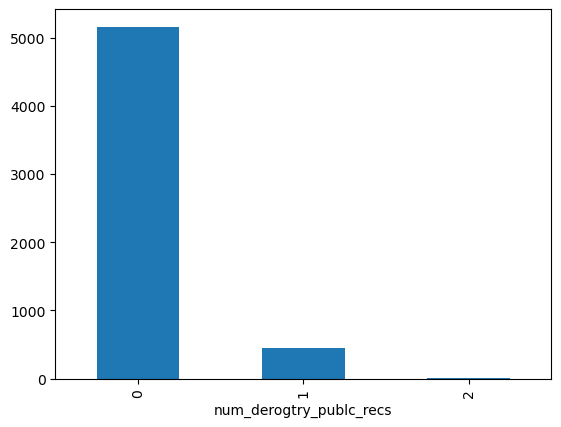

In [149]:
grouped = udf1.groupby('num_derogtry_publc_recs')['loan_status_value'].count()

grouped.plot(kind='bar')

/var/folders/77/ctnwfzn11db8gx0b2gh55y0h0000gn/T/ipykernel_73518/3102147290.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf1['dm_label'] = udf1['mths_since_last_delinq'].apply(get_dm_label)


<Axes: xlabel='dm_label'>

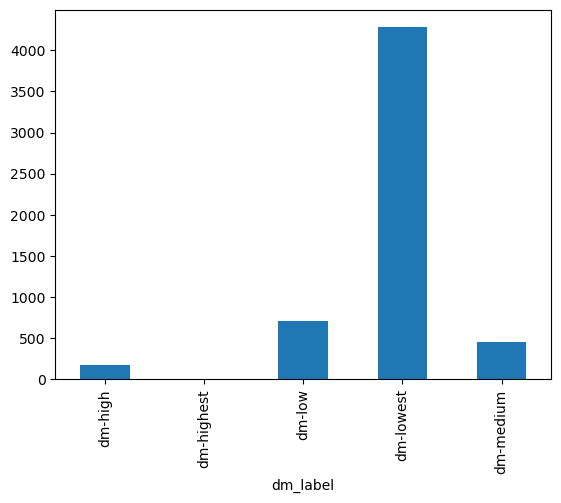

In [150]:
def get_dm_label(number):
    if number < 0 or number > 121:
        raise ValueError("Number should be between 500 and 35000.")

    bin_width = 121 / 5  # Calculate the width of each bin
    bin_labels = ['dm-lowest', 'dm-low', 'dm-medium', 'dm-high', 'dm-highest']  # Labels for the bins
    bin_start = 0  # Starting point of the first bin
    
    # Calculate the bin index
    bin_index = int((number - bin_start) // bin_width)
    
    # Return the corresponding bin label
    return bin_labels[bin_index]

udf1['dm_label'] = udf1['mths_since_last_delinq'].apply(get_dm_label)
grpd_lnstatus = udf1.groupby(by='dm_label')['loan_status_value'].count()
grpd_lnstatus.plot(kind='bar')

/var/folders/77/ctnwfzn11db8gx0b2gh55y0h0000gn/T/ipykernel_73518/2482571725.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf1['dti_label'] = udf1['debt_to_income_ratio'].apply(get_dti_label)


<Axes: xlabel='dti_label'>

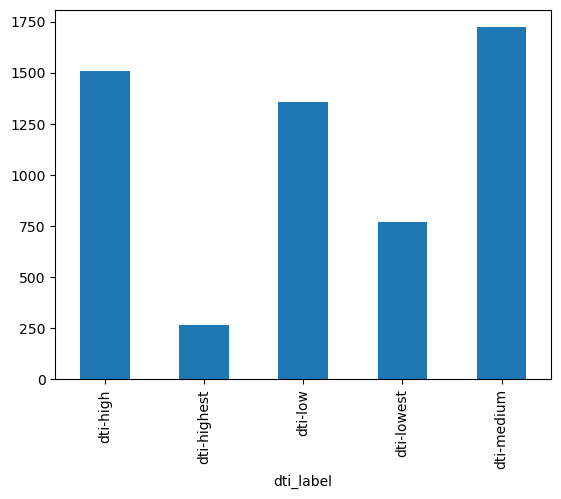

In [151]:
def get_dti_label(number):
    if number < 0 or number > 30:
        raise ValueError("Number should be between 500 and 35000.")

    bin_width = (30) / 5  # Calculate the width of each bin
    bin_labels = ['dti-lowest', 'dti-low', 'dti-medium', 'dti-high', 'dti-highest']  # Labels for the bins
    bin_start = 0  # Starting point of the first bin
    
    # Calculate the bin index
    bin_index = int((number - bin_start) // bin_width)
    
    # Return the corresponding bin label
    return bin_labels[bin_index]

udf1['dti_label'] = udf1['debt_to_income_ratio'].apply(get_dti_label)
grpd_lnstatus = udf1.groupby(by='dti_label')['loan_status_value'].count()
grpd_lnstatus.plot(kind='bar')

In [152]:
udf1.loan_status_value.value_counts()

-1    5627
Name: loan_status_value, dtype: int64

/var/folders/77/ctnwfzn11db8gx0b2gh55y0h0000gn/T/ipykernel_73518/1388258608.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf1['apprvd_loan_amount_label'] = udf1['curr_apprvd_loan_amnt'].apply(lambda x: get_bin_label(x))


<Axes: xlabel='apprvd_loan_amount_label'>

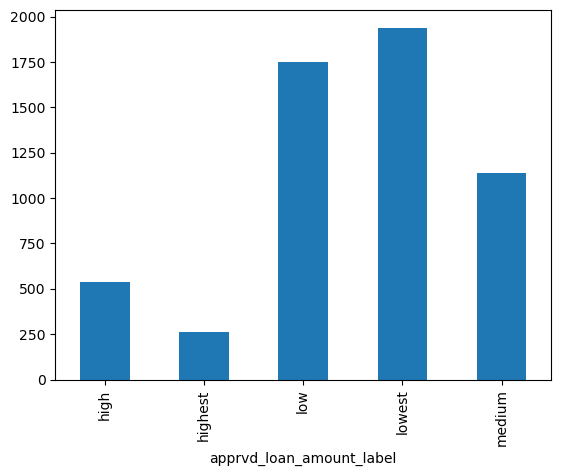

In [153]:
def get_bin_label(number):
    if number < 499 or number > 35001:
        raise ValueError("Number should be between 500 and 35000.")

    bin_width = (35001 - 499) / 5  # Calculate the width of each bin
    bin_labels = ['lowest', 'low', 'medium', 'high', 'highest']  # Labels for the bins
    bin_start = 500  # Starting point of the first bin
    
    # Calculate the bin index
    bin_index = int((number - bin_start) // bin_width)
    
    # Return the corresponding bin label
    return bin_labels[bin_index]

udf1['apprvd_loan_amount_label'] = udf1['curr_apprvd_loan_amnt'].apply(lambda x: get_bin_label(x))

grpd_lnstatus = udf1.groupby(by='apprvd_loan_amount_label')['loan_status_value'].count()
grpd_lnstatus.plot(kind='bar')

<Axes: xlabel='home_ownership'>

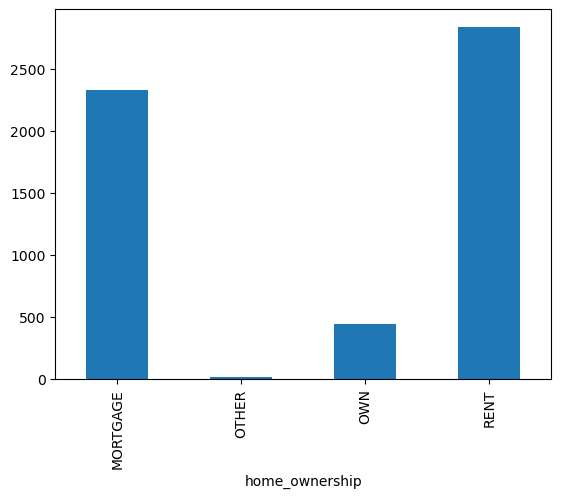

In [154]:
grpd_lnstatus = udf1.groupby(by='home_ownership')['loan_status_value'].count()
grpd_lnstatus.plot(kind='bar')

<Axes: xlabel='loan_term_mnths'>

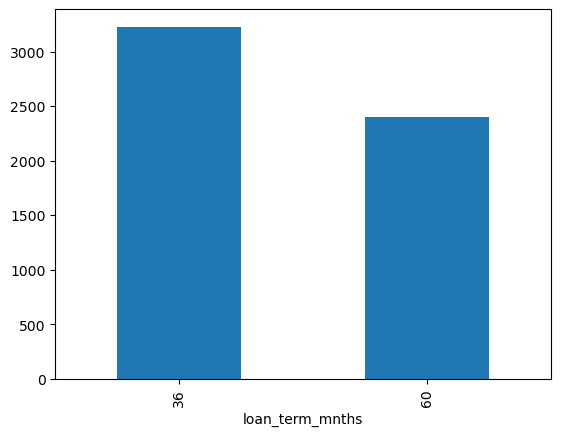

In [155]:
grpd_lnstatus = udf1.groupby(by='loan_term_mnths')['loan_status_value'].count()
grpd_lnstatus.plot(kind='bar')

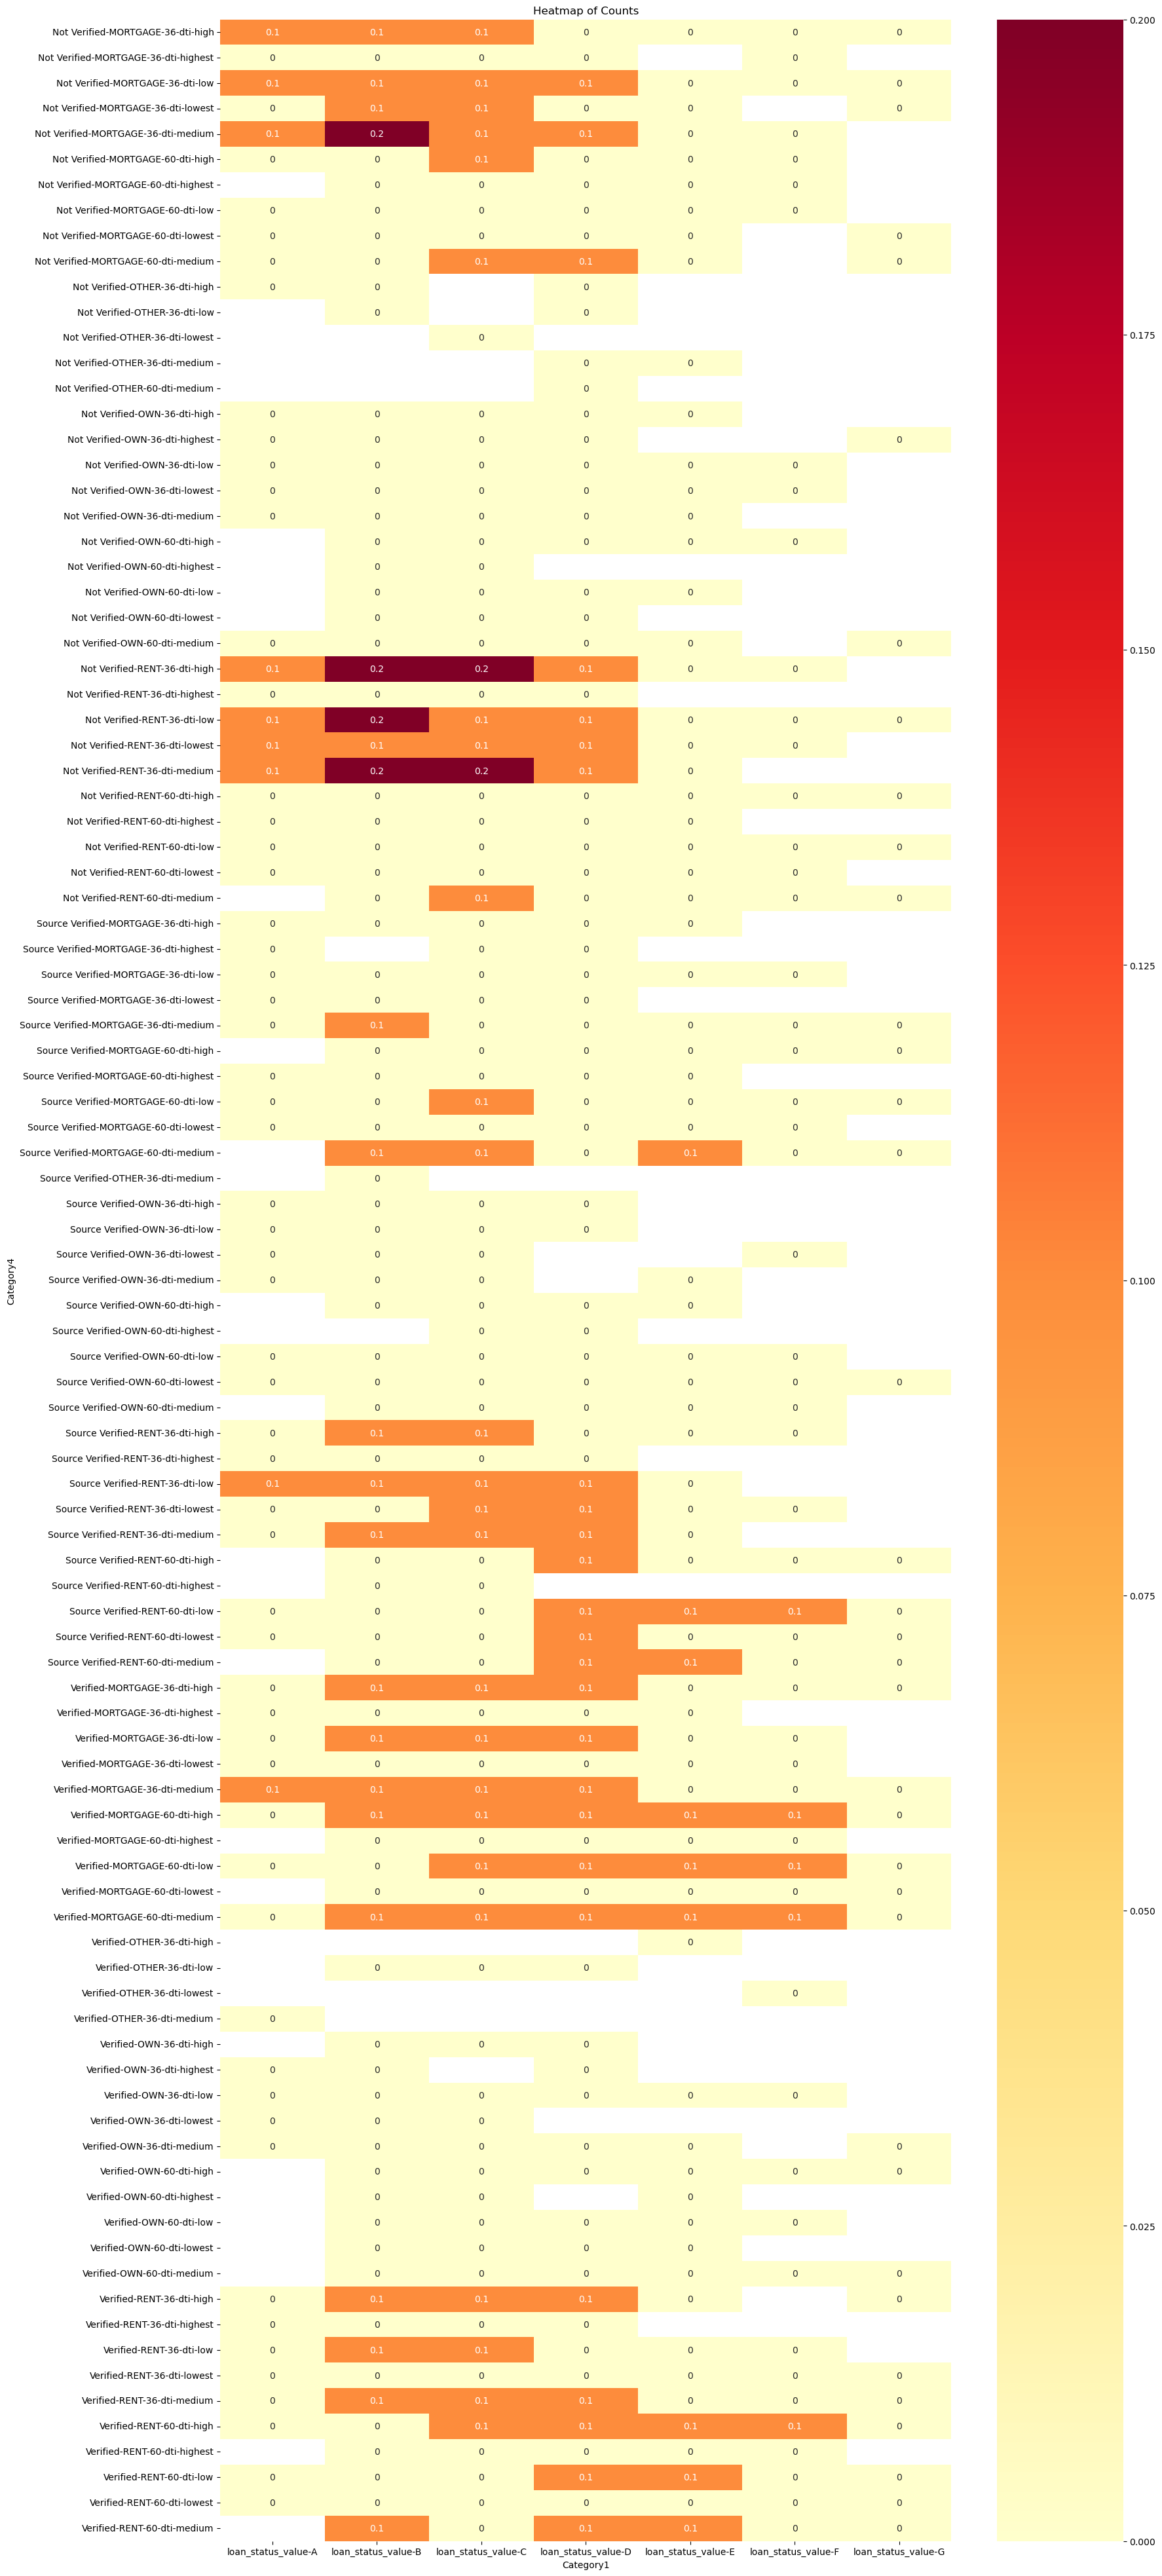

In [156]:




# Create a pivot table with counts
pivot_table = pd.pivot_table(udf1, values='loan_status_value', index=['assgnd_loan_grade', 'incm_src_verification_status', 'home_ownership', 'loan_term_mnths','dti_label'],
                             aggfunc=lambda x: len(x)/len(udf) * 100)

# Reshape the pivot table for heatmap
heatmap_data = pivot_table.unstack(level='assgnd_loan_grade')

heatmap_data = np.round(heatmap_data, decimals=1)


# Create a heatmap using seaborn
plt.figure(figsize=(18, 50))  # Set the figure size
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlOrRd')

# Set the labels and title
plt.xlabel('Category1')
plt.ylabel('Category4')
plt.title('Heatmap of Counts')

# Display the heatmap
plt.show()


In [157]:

pd.pivot_table(udf1,values='loan_status_value',index='num_of_30plus_del_amt_for_2yrs',columns='loan_status',aggfunc=lambda x: (len(x)/len(udf) *100))



loan_status,Charged Off
num_of_30plus_del_amt_for_2yrs,
0,12.427928
1,1.276531
2,0.327316
3,0.088123
4,0.032732
5,0.007553
6,0.002518
7,0.002518
8,0.002518


In [158]:
len(set(udf1.borrower_emplymnt_title))

4637

loan_purpose
car                    160
credit_card            542
debt_consolidation    2767
educational             56
home_improvement       347
house                   59
major_purchase         222
medical                106
moving                  92
other                  633
renewable_energy        19
small_business         475
vacation                53
wedding                 96
Name: loan_status, dtype: int64

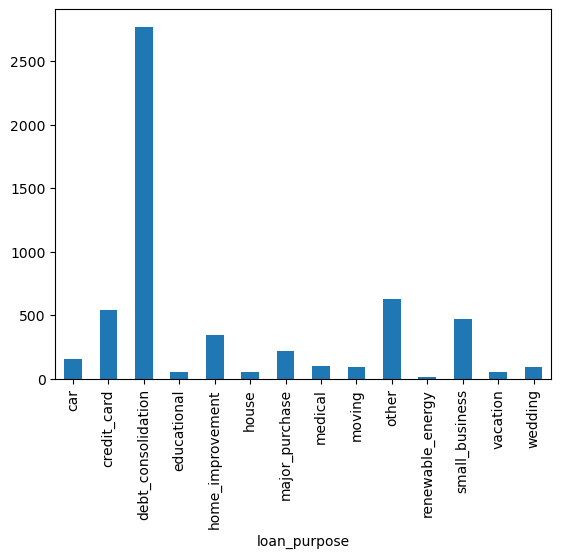

In [159]:
grpd_lnstatus = udf1.groupby(by='loan_purpose')['loan_status'].count()
grpd_lnstatus.plot(kind='bar')
grpd_lnstatus


#plt.xlabel('loan_purpose')
#plt.ylabel('Count')

In [161]:
#udf1.reset_index(inplace=True)
udf1

#udf1.drop(['last_total_pymnt_amnt_receivd','loan_listing_id','last_total_pymnt_amnt_receivd','next_payment_date','num_derogtry_publc_recs','url'],axis=1,inplace=True)


,index,curr_apprvd_loan_amnt,funded_amnt,total_committed_amnt_by_investors,loan_term_mnths,loan_interest_rate,mnthly_installment,assgnd_loan_grade,sub_grade,borrower_emplymnt_title,...,recoveries,collection_fee_post_chargeoff,last_mnth_was_pymnt_receivd,last_total_pymnt_amnt_receivd,mnth_recent_credit_pulled,num_publc_rec_bankruptcies,loan_status_value,dm_label,dti_label,apprvd_loan_amount_label
0,1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,...,117.08,1.1100,2013-04-01,119.66,2013-09-01,0.0,-1,dm-lowest,dti-lowest,lowest
1,8,5600,5600,5600.0,60,21.28,152.39,F,F2,NaN,...,189.06,2.0900,2012-04-01,152.39,2012-08-01,0.0,-1,dm-lowest,dti-lowest,lowest
2,9,5375,5375,5350.0,60,12.69,121.45,B,B5,Starbucks,...,269.29,2.5200,2012-11-01,121.45,2013-03-01,0.0,-1,dm-lowest,dti-high,lowest
3,12,9000,9000,9000.0,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,...,444.30,4.1600,2012-07-01,305.38,2012-11-01,0.0,-1,dm-lowest,dti-low,low
4,14,10000,10000,10000.0,36,10.65,325.74,B,B2,SFMTA,...,645.10,6.3145,2013-10-01,325.74,2014-03-01,0.0,-1,dm-lowest,dti-low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5622,39667,2500,2500,675.0,36,12.80,84.00,D,D4,Nebraska Occupational Therapy,...,35.70,0.3800,2010-03-01,1.76,2016-05-01,NaN,-1,dm-lowest,dti-high,lowest
5623,39668,2500,2500,825.0,36,9.64,80.26,B,B4,AMZ Marketing,...,0.00,0.0000,2010-03-01,1.40,2016-05-01,NaN,-1,dm-lowest,dti-high,lowest
5624,39669,6500,6500,225.0,36,15.01,225.37,F,F1,Universal Advertising,...,0.00,0.0000,2009-02-01,225.37,2016-05-01,NaN,-1,dm-lowest,dti-low,lowest
5625,39678,1000,1000,950.0,36,10.59,32.55,C,C2,Invision Power Services,...,21.29,0.2300,2009-05-01,32.55,2009-10-01,NaN,-1,dm-lowest,dti-medium,lowest


In [ ]:
udf1.drop(['num_publc_rec_bankruptcies'],axis=1,inplace=True)

In [ ]:
udf1.drop(['loan_title'],axis=1,inplace=True)

In [ ]:
# Group by 'Category' column and create a boxplot of 'Value' column
grouped = udf1.groupby('loan_purpose')
boxplot_data = [group[1]['num_total_curr_acc_lines_'] for group in grouped]
categories = [group[0] for group in grouped]

plt.figure(figsize=(19,8))
# Create the boxplot
plt.boxplot(boxplot_data)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Boxplot of Value by Category')
plt.xticks(range(1, len(categories) + 1), categories)

# Display the chart
plt.show()


In [ ]:


# Group by 'Category' column and collect values in 'Value' column
grouped = udf1.groupby('loan_status')['num_total_curr_acc_lines_'].apply(list)

# Create a scatter bar chart
x = np.arange(len(grouped))
y = [np.median(values) for values in grouped.values]

plt.bar(x, y)

# Set x-axis tick labels to the categories
plt.xticks(x, grouped.index)

# Set labels and title
plt.xlabel('Loan status')
plt.ylabel('Median of credit lines opened')
plt.title('Chart to show effect of credit lines on loan status')

# Display the chart
plt.show()


In [ ]:
import re

#udf.dtypes
udf1.emplyment_len_yrs = udf1['emplyment_len_yrs'].astype(str).apply(lambda x: re.findall(r'\d+\.?\d*', x)[0] if re.findall(r'\d+\.?\d*', x) else None)

In [ ]:
udf1.emplyment_len_yrs.value_counts()
pd.pivot_table(udf1,index= 'emplyment_len_yrs',columns='loan_status',values='loan_status_value',aggfunc='count')

In [ ]:




# Group the data by 'Number' and 'Letter', and count the occurrences
grouped = udf1.groupby(['emplyment_len_yrs', 'loan_status_value']).size().unstack()

# Plot the stacked line diagram
grouped.plot(kind='line', stacked=True)

# Set labels and title
plt.xlabel('Years Experience')
plt.ylabel('Number of loan_status instances')
plt.title('Effect of years of employee experience on loan delinquency')

# Display the diagram
plt.show()


In [ ]:

grouped = udf1.groupby('emplyment_len_yrs')['loan_status'].count()
udf1.loan_status_value.value_counts()
# Plot the linear graph
plt.plot(grouped, marker='o')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Graph')

# Display the graph
plt.show()


In [ ]:
udf1.columns

In [ ]:


grouped = udf1.groupby(['num_inq_past_6mnths', 'loan_status_value']).size().unstack()

# Plot the stacked line diagram
grouped.plot(kind='line', stacked=True)

# Set labels and title
plt.xlabel('Number of inquires ( past 6 months )')
plt.ylabel('Number of Deliquent and current loan instances')
plt.title('Effect of inquiries on loan delinquency')

# Display the diagram
plt.show()

In [ ]:

pd.pivot_table(udf1,index = 'loan_purpose',columns=['emplyment_len_yrs'],values='loan_status_value',aggfunc=lambda x: (len(x)/len(udf1) * 100)).round(1)

In [ ]:
udf1['month_pymt_rcvd'] = udf1['last_mnth_was_pymnt_receivd'].dt.strftime('%b')
# Define the custom sort order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' column to categorical type with the defined sort order
udf1['month_pymt_rcvd'] = pd.Categorical(udf1['month_pymt_rcvd'], categories=month_order, ordered=True)

udf1.month_pymt_rcvd.value_counts().sort_index().plot.bar()

plt.xlabel('Month')
plt.ylabel('count')

plt.title('The last month of payment and its count')